In [2]:
import pandas as pd
import os

# Path to results
DATA_PATH = "../results/syntactic_optimality_results.csv"

df = pd.read_csv(DATA_PATH)

print("Total rows:", len(df))
df.head()


Total rows: 21000


,language,sent_id,N,L,d_real,d_min,d_rand,omega
0,Arabic,n01001011,41,40,4.3073,1.9512,6.8935,0.5233
1,Arabic,n01001013,23,22,4.5059,1.9130,4.8670,0.1222
2,Arabic,n01002017,36,35,4.3571,1.9444,6.3282,0.4496
3,Arabic,n01002032,15,14,3.3905,1.8667,3.7932,0.2091
4,Arabic,n01002042,10,9,2.4444,1.8000,2.9668,0.4477


In [3]:
# Drop NaN omegas (should be very few)
df = df.dropna(subset=["omega"])

print("After dropping NaNs:", len(df))


After dropping NaNs: 20999


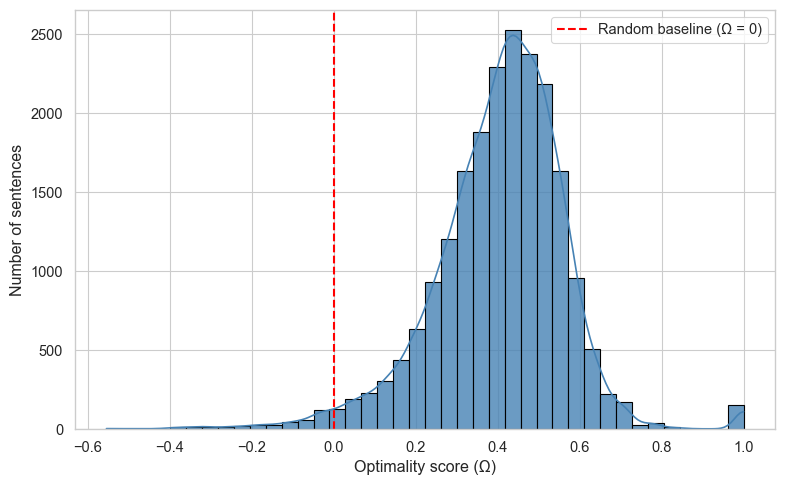

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

plt.figure(figsize=(8, 5))

# Histogram + KDE
sns.histplot(
    df["omega"],
    bins=40,
    kde=True,
    color="steelblue",
    edgecolor="black",
    alpha=0.8
)

# Reference line at Omega = 0 (random baseline)
plt.axvline(0, color="red", linestyle="--", linewidth=1.5, label="Random baseline (Ω = 0)")

plt.xlabel("Optimality score (Ω)")
plt.ylabel("Number of sentences")
plt.legend()

plt.tight_layout()

# Save figure
plt.savefig("../analysis-results/histogram.pdf", format="pdf")
plt.show()


/var/folders/f9/2b844k6j623_mwcbpn3sml780000gn/T/ipykernel_36667/4221006958.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


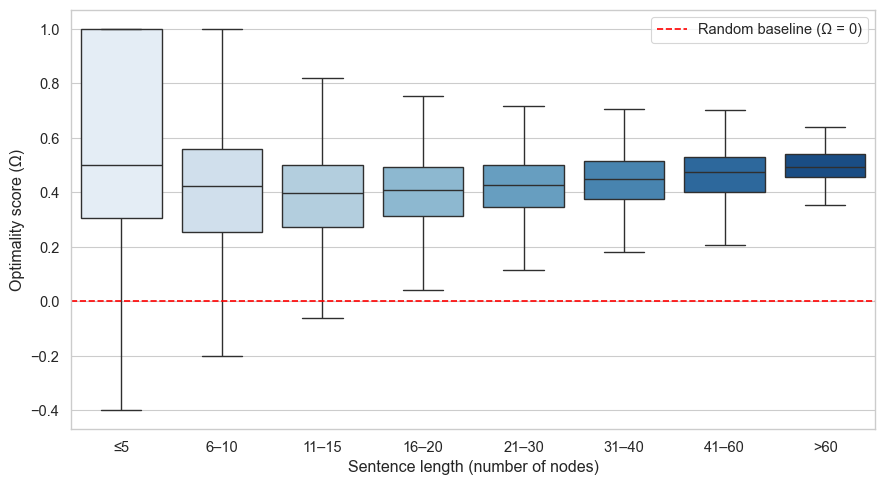

In [10]:
import numpy as np

# Define bins (sentence length)
bins = [0, 5, 10, 15, 20, 30, 40, 60, 100]
labels = ["≤5", "6–10", "11–15", "16–20", "21–30", "31–40", "41–60", ">60"]

df["N_bin"] = pd.cut(df["N"], bins=bins, labels=labels, right=True)
df["N_bin"].value_counts().sort_index()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))

sns.boxplot(
    x="N_bin",
    y="omega",
    data=df,
    palette="Blues",
    showfliers=False
)

plt.axhline(0, color="red", linestyle="--", linewidth=1.2, label="Random baseline (Ω = 0)")

plt.xlabel("Sentence length (number of nodes)")
plt.ylabel("Optimality score (Ω)")
plt.legend()

plt.tight_layout()
plt.savefig("../analysis-results/fig2_omega_by_length_bins.pdf", format="pdf")
plt.show()
